Episode 100: Total Reward: 0.0
Episode 200: Total Reward: 0.0
Episode 300: Total Reward: 1.0
Episode 400: Total Reward: 1.0
Episode 500: Total Reward: 1.0
Episode 600: Total Reward: 1.0
Episode 700: Total Reward: 1.0
Episode 800: Total Reward: 1.0
Episode 900: Total Reward: 1.0
Episode 1000: Total Reward: 0.0
Episode 1100: Total Reward: 1.0
Episode 1200: Total Reward: 1.0
Episode 1300: Total Reward: 1.0
Episode 1400: Total Reward: 1.0
Episode 1500: Total Reward: 1.0
Episode 1600: Total Reward: 1.0
Episode 1700: Total Reward: 1.0
Episode 1800: Total Reward: 1.0
Episode 1900: Total Reward: 1.0
Episode 2000: Total Reward: 1.0
Episode 2100: Total Reward: 1.0
Episode 2200: Total Reward: 1.0
Episode 2300: Total Reward: 1.0
Episode 2400: Total Reward: 1.0
Episode 2500: Total Reward: 1.0
Episode 2600: Total Reward: 1.0
Episode 2700: Total Reward: 1.0
Episode 2800: Total Reward: 0.0
Episode 2900: Total Reward: 1.0
Episode 3000: Total Reward: 1.0
Episode 3100: Total Reward: 1.0
Episode 3200: Tot

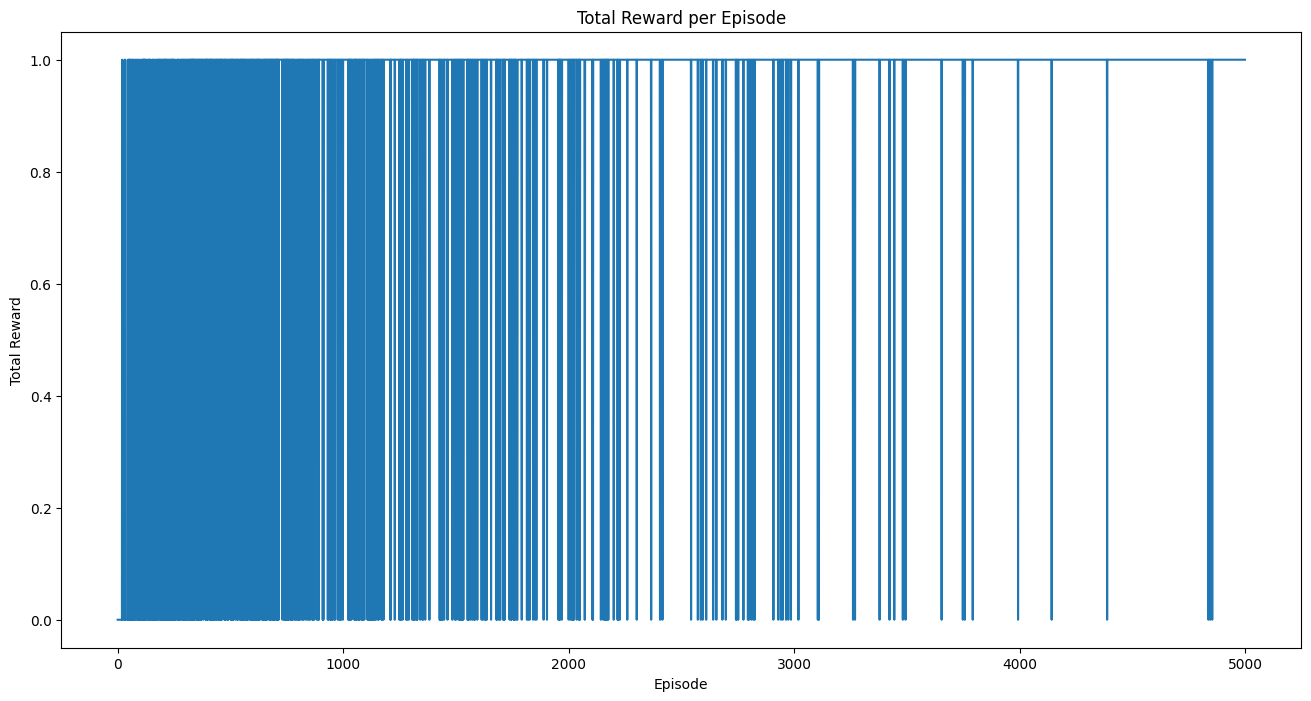

In [21]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

class QLearningAgent:
    def __init__(self, env, lr=0.1, gamma=0.99, epsilon=0.5):
        self.env = env
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        # Initialize Q-table with ones (optimistic initialization)
        self.q_table = np.ones((self.env.observation_space.n, self.env.action_space.n))

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state, :])

    def update_q_value(self, state, action, reward, next_state, done):
        # Add a small step penalty to encourage shorter paths
        step_penalty = -0.01
        reward += step_penalty

        best_next_action = np.argmax(self.q_table[next_state, :])
        td_target = reward + self.gamma * self.q_table[next_state, best_next_action] * (not done)
        td_error = td_target - self.q_table[state, action]
        self.q_table[state, action] += self.lr * td_error

    def reset(self):
        return self.env.reset()[0]

    def play(self, rounds=5000):
        total_rewards = []

        for episode in range(rounds):
            state = self.reset()
            done = False
            episode_reward = 0

            while not done:
                action = self.choose_action(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated
                self.update_q_value(state, action, reward, next_state, done)

                state = next_state
                episode_reward += reward

            total_rewards.append(episode_reward)

            # Decay epsilon
            self.epsilon = max(0.01, self.epsilon * 0.999)

            # Print out progress every 100 episodes
            if (episode + 1) % 100 == 0:
                print(f"Episode {episode + 1}: Total Reward: {episode_reward}")

        return total_rewards

    def show_q_table(self):
        print("Q-table:")
        print(self.q_table)

    def extract_policy(self):
        policy = np.argmax(self.q_table, axis=1)
        return policy.reshape((4, 4))  # Assuming a 4x4 grid

# Main execution
if __name__ == "__main__":
    env = gym.make('FrozenLake-v1', is_slippery=False)

    # Initialize the Q-Learning agent
    agent = QLearningAgent(env, lr=0.1, gamma=0.99, epsilon=0.5)

    # Train the agent for 5000 episodes
    rewards = agent.play(rounds=5000)

    # Show the learned Q-table
    agent.show_q_table()

    # Extract and display the learned policy
    policy = agent.extract_policy()
    print("Learned Policy:")
    print(policy)

    # Plot the total rewards over episodes
    plt.figure(figsize=(16,8))
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode')
    plt.show()

    # Close the environment
    env.close()
